In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data prep

In [3]:
data = pd.read_csv("C:/Users/yangz/Desktop/UCI MSBA 2019-2020/winter - capstone project/1.data/206col_20_80Split.csv")
df = data.iloc[:, 1:]

In [46]:
df

ECN  signal_OWNER_OCPY_REFI_MR  signal_owner_ocpy_eqty_mr  \
0            7001793774                  40.654992                  11.017688   
1              11021343                   0.000000                   0.000000   
2          210551541856                   0.000000                   0.000000   
3       181602621755612                   0.000000                   0.000000   
4       313652670110365                   0.000000                   0.000000   
...                 ...                        ...                        ...   
606615        112130936                   0.000000                   0.000000   
606616  728108006644058                   0.000000                   0.000000   
606617   41699900904366                   0.000000                   0.000000   
606618       9031310882                   0.000000                   5.000000   
606619   21881121829119                   0.000000                   0.000000   

        signal_owner_ocpy_home_mr  AcctActivitySearch  LoginApp_SessionLogin  \
0                       58.850744            0.000000               0.000000   
1                        0.000000            0.333333               3.000000   
2                        0.000000            0.000000               0.000000   
3                        0.000000            0.000000               0.000000   
4                        0.000000            0.000000               0.000000   
...                           ...                 ...                    ...   
606615                 110.000000            0.000000               0.000000   
606616                   0.000000            0.000000               0.000000   
606617                   0.000000           13.333333              62.000000   
606618                 124.000000            1.000000              54.666667   
606619                   0.000000            1.666667              25.666667   

        MsgCtr_MsgSelection  Transfer  gmail  yahoo  ...  Proactive_Agg  \
0                  0.000000       0.0    0.0    0.0  ...            0.0   
1                  0.000000       1.0    1.0    1.0  ...            0.0   
2                  0.000000       0.0    0.0    0.0  ...            0.0   
3                  0.000000       0.0    0.0    0.0  ...            0.0   
4                  0.000000       0.0    0.0    0.0  ...            0.0   
...                     ...       ...    ...    ...  ...            ...   
606615             0.000000       0.0    0.0    0.0  ...            0.0   
606616             0.000000       0.0    0.0    0.0  ...            0.0   
606617             1.333333       0.0    1.0    1.0  ...            0.0   
606618             0.000000       0.0    0.0    0.0  ...            0.0   
606619             1.333333       6.0    1.0    0.0  ...            0.0   

        Transaction_Agg  Complain_Agg  Complain_Resolve_Agg  OweAccnt_Agg  \
0                   0.0           0.0                   0.0           0.0   
1                   0.0           0.0                   0.0           0.0   
2                   0.0           0.0                   0.0           0.0   
3                   0.0           0.0                   0.0           0.0   
4                   0.0           0.0                   0.0           0.0   
...                 ...           ...                   ...           ...   
606615              0.0           0.0                   0.0           0.0   
606616              0.0           0.0                   0.0           1.0   
606617              0.0           0.0                   0.0           0.0   
606618              0.0           0.0                   0.0           3.0   
606619              0.0           0.0                   0.0           0.0   

        OwnAccnt_Agg  Own_Bal_Agg  Owe_Bal_Agg  Targ_BillPay  Group  
0                0.0     0.000000         0.00             0  Train  
1                0.0     2.386282         0.00             0  Train  
2                0.0     0.000000         0.00    

In [4]:
Train = df[df['Group'] == 'Train']
Test = df[df['Group'] == 'Test']

In [5]:
X_train = Train.drop(['Targ_BillPay', 'Group'], axis = 1)
y_train = Train['Targ_BillPay']

In [6]:
X_test = Test.drop(['Targ_BillPay', 'Group'], axis = 1)
y_test = Test['Targ_BillPay']

In [7]:
train = pd.concat([X_train,y_train], axis = 1)

train_target1 = train[train.iloc[:,-1] == 1]
train_target0 = train[train.iloc[:,-1] == 0]

train_target0_sample = train_target0.sample(frac = 0.00132, random_state = 1)
#train_target0_sample

In [8]:
train_sample = pd.concat([train_target1, train_target0_sample], axis = 0)

In [9]:
train_sample.Targ_BillPay.value_counts()

1    641
0    640
Name: Targ_BillPay, dtype: int64

In [10]:
X_train_var = train_sample.iloc[:,:-1]
y_train_var = train_sample.iloc[:,-1]

In [11]:
test = pd.concat([X_test,y_test], axis = 1)

test_target1 = test[test.iloc[:,-1] == 1]
test_target0 = test[test.iloc[:,-1] == 0]

test_target0_sample = test_target0.sample(frac = 0.00145, random_state = 1)
#test_target0_sample

In [12]:
test_sample = pd.concat([test_target1, test_target0_sample], axis = 0)

In [13]:
test_sample.Targ_BillPay.value_counts()

0    176
1    175
Name: Targ_BillPay, dtype: int64

In [14]:
X_test_var = test_sample.iloc[:,:-1]
y_test_var = test_sample.iloc[:,-1]

In [15]:
#X_train_var = X_train_var.set_index('ECN')
#X_test_var = X_test_var.set_index('ECN')

Naive Bayes: prerequisite: feature independence

GaussianNB: continuous features

MultinomialNB: discrete features, X/features must be non-negative, can do CV

BernoulliNB: discrete features, X must be 0 or 1

In [49]:
print(X_train_var.shape)
print(X_test_var.shape)
print(y_train_var.shape)
print(y_test_var.shape)
y_test = y_test_var
y_train = y_train_var
X_test = X_test_var
X_train = X_train_var

(1281, 202)
(351, 202)
(1281,)
(351,)


# basic model - Gaussian Naive Bayes

reference: https://yq.aliyun.com/articles/408869

In [50]:
# modeling
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))
# Number of mislabeled points out of a total 121324 points : 174

Number of mislabeled points out of a total 351 points : 185


In [51]:
# accuracy
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47293447293447294


In [52]:
# confusion matrix
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[ 50, 126],
       [ 59, 116]], dtype=int64)

C:\Users\yangz\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


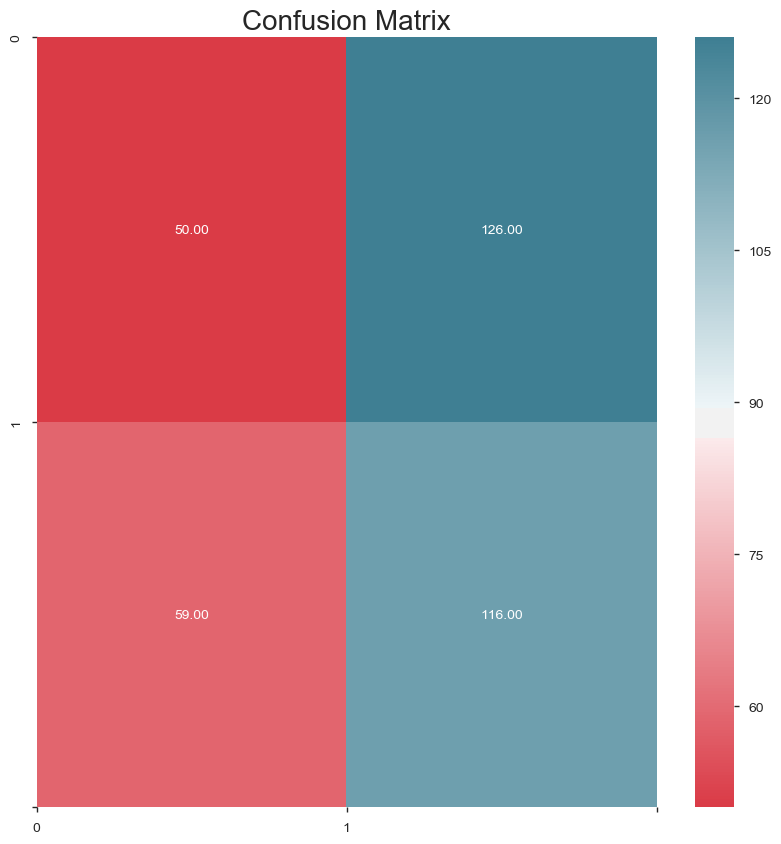

In [53]:
# confusion matrix
import seaborn as sns
def heatMap(df):
    #Create Correlation df
    corr = df
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(10, 220, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)+1), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)+1), corr.columns)
    plt.title("Confusion Matrix", size = 20)
    #show plot
    plt.show()
heatMap(pd.DataFrame(conf_mx))

C:\Users\yangz\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


<Figure size 800x550 with 0 Axes>

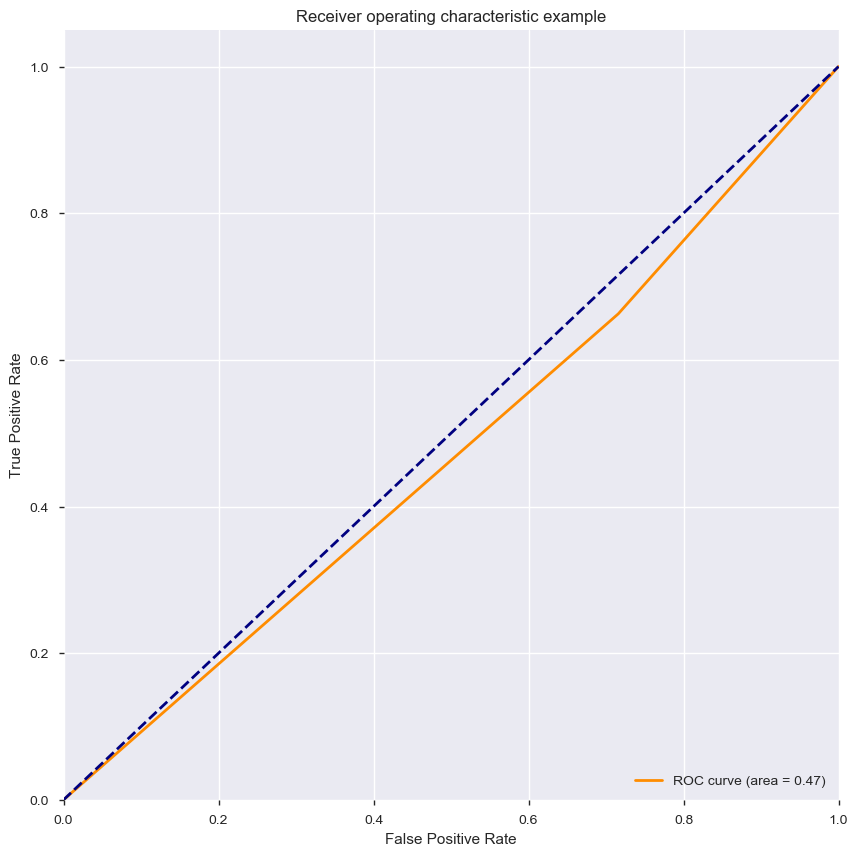

In [54]:
# ROC, AUC
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_pred) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
roc_auc


plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [55]:
# all evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from time import time
    
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels,pred),3)
    precision = round(precision_score(labels,pred),3)
    recall = round(recall_score(labels,pred),3)
    f1 = round(f1_score(labels,pred),3)
    roc = round(roc_auc_score(labels,pred),3)
    
    print('{} -- Accuracy:{} / Precision:{} / Recall:{} / F1:{} / ROC:{} / Latency:{}ms'.format(name, accuracy, precision, recall,f1,roc ,round(end-start)))
    
evaluate_model('Naive Bayes', gnb, X_test, y_test)   

Naive Bayes -- Accuracy:0.473 / Precision:0.479 / Recall:0.663 / F1:0.556 / ROC:0.473 / Latency:0ms


# refinied model

In [23]:
# cross validation
#from sklearn.model_selection import cross_validate, KFold, cross_val_score
#k_fold = KFold(len(y_train_var), n_splits=10, shuffle=True, random_state=0)
#print(cross_val_score(gnb, X, y, cv=k_fold, n_jobs=1))

hyperparameter tuning - no hyperparameter o be tuned

feature engineering - delete correlated variables-201 to 151

In [24]:
# see correlation
#!pip install pandas-profiling
import pandas_profiling
from pandas_profiling import ProfileReport

In [60]:
ProfileReport(X_train)

C:\Users\yangz\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [56]:
X_train1 = X_train.drop(['AUTHPS','SOTAPRFM','min_d_sn_last_mds_dt','prev_cyc_02_avg_led_bal','stmtbal_to_pay','total_spend','CC_CONS_EOM_BAL',
'CC_CONS_PRIM_ACCT_CT','CC_CONS_PRIM_EOM_BAL','IBT_CK_CONS_EOM_BAL','IBT_CK_CONS_PRIM_EOM_BAL','NIBT_CK_CONS_EOM_BAL',
'NIBT_CK_CONS_PRIM_EOM_BAL','PROD_CONS_ACCT_CT','SAV_CONS_EOM_BAL','SAV_CONS_PRIM_EOM_BAL','OLB_ONLN_ACT_AGREE_ESN_IN',
'DAYS_SINCE_FRST_DSKTP_SGN','DAYS_SINCE_LST_DSKTP_SGN','DAYS_SINCE_OLB_ENRLL','DAYS_SINCE_OLB_AGREE_ESN',
'AROID_ACT_30_DY_IND','AROID_ACT_90_DY_IND','IPHN_ACT_30_DY_IND','IPHN_ACT_90_DY_IND','MBL_ACT_ANY_SVC_30_DY_IND',
'MBL_ACT_ANY_SVC_90_DY_IND','MBL_ACT_DY_CNT','MBL_COMB_ACT_1_MO_IND','MBL_COMB_ACT_30_DY_IND','MBL_COMB_ACT_90_DY_IND',
'MBL_ON_US_XFR_ACT_30_DY_I','MBL_ON_US_XFR_ACT_90_DY_I','MBL_ON_US_XFR_CNT','MBL_PREV_ACT_ANY_90_DY_IN',
'MBL_PREV_APPL_ACT_90_DY_C','MBL_PREV_AROID_ACT_90_DY_','MBL_PREV_BRWSR_ACT_90_DY_','MBL_PREV_COMB_ACT_90_DY_I',
'MBL_PREV_IPHN_ACT_90_DY_I','MBL_WF_TOT_SESS_CNT','MBL_XFR_ACT_1_MO_IND','MBL_XFR_ACT_30_DY_IND','MBL_XFR_ACT_90_DY_IND',
'MBL_XFR_AMT','MBL_XFR_CNT','MOB_ACT_1_MO_IND','MOB_ACT_30_DY_IND','MOB_ACT_90_DY_IND','Transaction_Agg'], axis=1)

In [57]:
X_test1 = X_test.drop(['AUTHPS','SOTAPRFM','min_d_sn_last_mds_dt','prev_cyc_02_avg_led_bal','stmtbal_to_pay','total_spend','CC_CONS_EOM_BAL',
'CC_CONS_PRIM_ACCT_CT','CC_CONS_PRIM_EOM_BAL','IBT_CK_CONS_EOM_BAL','IBT_CK_CONS_PRIM_EOM_BAL','NIBT_CK_CONS_EOM_BAL',
'NIBT_CK_CONS_PRIM_EOM_BAL','PROD_CONS_ACCT_CT','SAV_CONS_EOM_BAL','SAV_CONS_PRIM_EOM_BAL','OLB_ONLN_ACT_AGREE_ESN_IN',
'DAYS_SINCE_FRST_DSKTP_SGN','DAYS_SINCE_LST_DSKTP_SGN','DAYS_SINCE_OLB_ENRLL','DAYS_SINCE_OLB_AGREE_ESN',
'AROID_ACT_30_DY_IND','AROID_ACT_90_DY_IND','IPHN_ACT_30_DY_IND','IPHN_ACT_90_DY_IND','MBL_ACT_ANY_SVC_30_DY_IND',
'MBL_ACT_ANY_SVC_90_DY_IND','MBL_ACT_DY_CNT','MBL_COMB_ACT_1_MO_IND','MBL_COMB_ACT_30_DY_IND','MBL_COMB_ACT_90_DY_IND',
'MBL_ON_US_XFR_ACT_30_DY_I','MBL_ON_US_XFR_ACT_90_DY_I','MBL_ON_US_XFR_CNT','MBL_PREV_ACT_ANY_90_DY_IN',
'MBL_PREV_APPL_ACT_90_DY_C','MBL_PREV_AROID_ACT_90_DY_','MBL_PREV_BRWSR_ACT_90_DY_','MBL_PREV_COMB_ACT_90_DY_I',
'MBL_PREV_IPHN_ACT_90_DY_I','MBL_WF_TOT_SESS_CNT','MBL_XFR_ACT_1_MO_IND','MBL_XFR_ACT_30_DY_IND','MBL_XFR_ACT_90_DY_IND',
'MBL_XFR_AMT','MBL_XFR_CNT','MOB_ACT_1_MO_IND','MOB_ACT_30_DY_IND','MOB_ACT_90_DY_IND','Transaction_Agg'], axis=1)

In [58]:
y_pred1 = gnb.fit(X_train1, y_train).predict(X_test1)
print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred1).sum()))

Number of mislabeled points out of a total 351 points : 185


In [59]:
evaluate_model('Naive Bayes', gnb, X_test1, y_test)

Naive Bayes -- Accuracy:0.473 / Precision:0.479 / Recall:0.663 / F1:0.556 / ROC:0.473 / Latency:0ms


feature engineering - delete correlated variables-201 to ...

In [48]:
X_train1.corr()

ECN  signal_OWNER_OCPY_REFI_MR  \
ECN                        1.000000                  -0.046673   
signal_OWNER_OCPY_REFI_MR -0.046673                   1.000000   
signal_owner_ocpy_eqty_mr  0.019316                   0.332237   
signal_owner_ocpy_home_mr -0.019503                   0.422233   
AcctActivitySearch        -0.011976                  -0.075941   
...                             ...                        ...   
Complain_Resolve_Agg       0.018598                  -0.001191   
OweAccnt_Agg               0.041398                   0.127152   
OwnAccnt_Agg               0.001254                  -0.002686   
Own_Bal_Agg                0.050553                  -0.007354   
Owe_Bal_Agg               -0.043166                   0.303930   

                           signal_owner_ocpy_eqty_mr  \
ECN                                         0.019316   
signal_OWNER_OCPY_REFI_MR                   0.332237   
signal_owner_ocpy_eqty_mr                   1.000000   
signal_owner_ocpy_home_mr                   0.215993   
AcctActivitySearch                         -0.047123   
...                                              ...   
Complain_Resolve_Agg                       -0.014980   
OweAccnt_Agg                                0.119607   
OwnAccnt_Agg                                0.033615   
Own_Bal_Agg                                 0.012466   
Owe_Bal_Agg                                 0.164597   

                           signal_owner_ocpy_home_mr  AcctActivitySearch  \
ECN                                        -0.019503           -0.011976   
signal_OWNER_OCPY_REFI_MR                   0.422233           -0.075941   
signal_owner_ocpy_eqty_mr                   0.215993           -0.047123   
signal_owner_ocpy_home_mr                   1.000000           -0.031377   
AcctActivitySearch                         -0.031377            1.000000   
...                                              ...                 ...   
Complain_Resolve_Agg                       -0.011295            0.072245   
OweAccnt_Agg                                0.126348           -0.014192   
OwnAccnt_Agg                                0.065409            0.052680   
Own_Bal_Agg                                -0.007320           -0.040431   
Owe_Bal_Agg                                 0.231063           -0.023915   

                           LoginApp_SessionLogin  MsgCtr_MsgSelection  \
ECN                                    -0.019096            -0.034736   
signal_OWNER_OCPY_REFI_MR              -0.013863            -0.043512   
signal_owner_ocpy_eqty_mr               0.005208            -0.012027   
signal_owner_ocpy_home_mr              -0.029475            -0.020906   
AcctActivitySearch                      0.504398             0.317234   
...                                          ...                  ...   
Complain_Resolve_Agg                    0.065858             0.100599   
OweAccnt_Agg                           -0.035399            -0.042927   
OwnAccnt_Agg                            0.038673             0.032669   
Own_Bal_Agg                            -0.038179            -0.033482   
Owe_Bal_Agg                            -0.007509            -0.005856   

                           Transfer     gmail     yahoo  ...  \
ECN                        0.042228 -0.018913 -0.037968  ...   
signal_OWNER_OCPY_REFI_MR -0.013941 -0.043396 -0.004999  ...   
signal_owner_ocpy_eqty_mr  0.047363 -0.001975 -0.033538  ...   
signal_owner_ocpy_home_mr  0.006152  0.048038  0.026065  ...   
AcctActivitySearch         0.314980  0.124316  0.066386  ...   
...                             ...       ...       ...  ...   
Complain_Resolve_Agg       0.100119  0.085887 -0.035169  ...   
OweAccnt_Agg              -0.004426 -0.058669  0.027240  ...   
OwnAccnt_Agg               0.077108 -0.033936  0.010793  ...   
Own_Bal_Agg               -0.033184 -0.031234 -0.034529  ...   
Owe_Bal_Agg                0.000091  0.013414  0.006000  ...   

       